<a href="https://colab.research.google.com/github/ulfiizza27/2141720052-PCVK-2023/blob/main/week-06/Week6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Kelompok 2 :
| Nama                                | No | NIM        |
| ----------------------------------- | -- | ---------- |
| Ulfi Mustatiq Abidatul Izza         | 26 | 2141720052 |

## 1. Melakukan import folder yang ada di Drive

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 2. Melakukan import beberapa library

In [23]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
import math
import os
import glob

## 3. Membuat histogram citra seperti output histogram berikut berdasarkan flowchart di bawah ini : (Gunakan gambar lena.jpg)


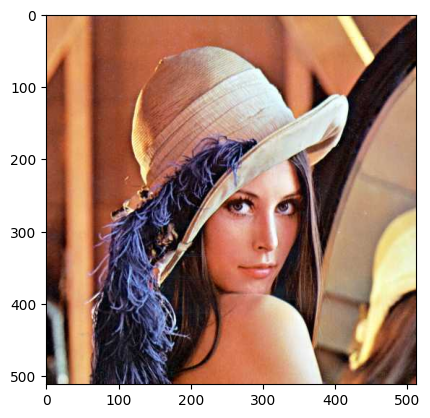

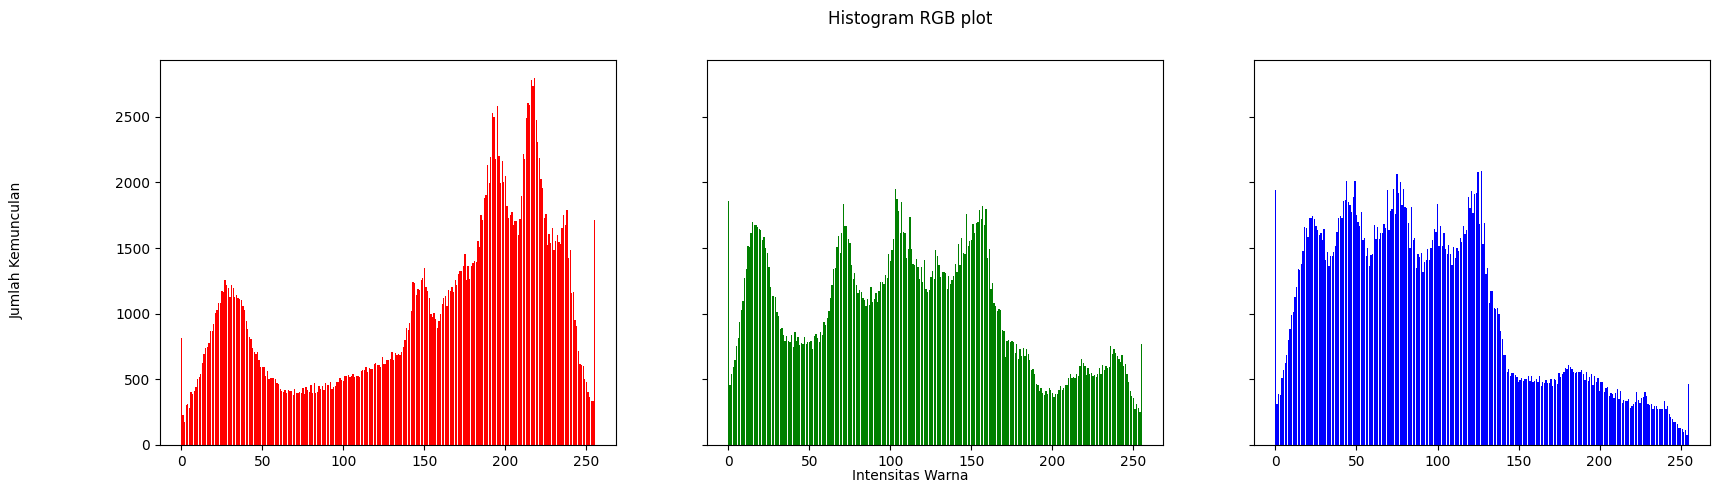

In [ ]:
# Load gambar dalam format RGB
img = cv.imread('/content/drive/MyDrive/PCVK/img/lena.jpg', cv.IMREAD_COLOR)
img_rgb = cv.cvtColor(img,cv.COLOR_BGR2RGB)
plt.imshow(img_rgb)

# Mendapatkan dimensi gambar
height, width, depth = np.shape(img)
names = np.arange(256)

# Inisialisasi array untuk menghitung jumlah kemunculan intensitas warna
blue = [0]*256
green = [0]*256
red = [0]*256

# Menghitung jumlah kemunculan intensitas warna pada setiap piksel gambar
for y in range(0,height):
  for x in range(0,width):
    blue[img[y][x][0]] += 1
    green[img[y][x][1]] += 1
    red[img[y][x][2]] += 1

names = np.arange(256)
fig, axs = plt.subplots(1, 3, figsize=[20,5], sharex=True, sharey=True)
fig.suptitle('Histogram RGB plot')
fig.text(0.05, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
fig.text(0.5, 0.04, 'Intensitas Warna', ha='center')
axs[0].bar(names, red, color='red')
axs[1].bar(names, green, color='green')
axs[2].bar(names, blue, color='blue')

plt.show()

## 4. Setelah mengerjakan soal no. 3, buatlah histogram citra yang sama akan tetapi menggunakan library yang dimiliki oleh NumPy yaitu “histogram”. Bandingkan hasilnya. Apakah output muncul sama?

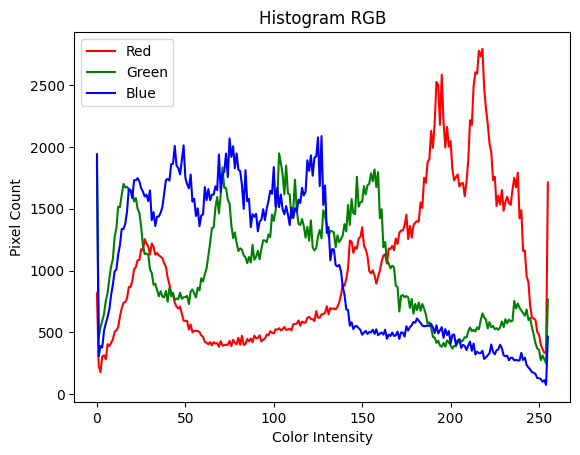

In [ ]:
# Load the image in RGB format
img = cv.imread('/content/drive/MyDrive/PCVK/img/lena.jpg', cv.IMREAD_COLOR)
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

# Split the image into color channels (R, G, B)
red_channel = img[:, :, 0]
green_channel = img[:, :, 1]
blue_channel = img[:, :, 2]

# Calculate the histograms for each color channel
red_hist = np.histogram(red_channel, bins=256, range=[0, 256])[0]
green_hist = np.histogram(green_channel, bins=256, range=[0, 256])[0]
blue_hist = np.histogram(blue_channel, bins=256, range=[0, 256])[0]

# Display the RGB histogram plot
plt.figure()
plt.title('Histogram RGB')
plt.xlabel('Color Intensity')
plt.ylabel('Pixel Count')
plt.plot(red_hist, color='red')
plt.plot(green_hist, color='green')
plt.plot(blue_hist, color='blue')
plt.legend(['Red', 'Green', 'Blue'])
plt.show()

## 5. Buatlah histogram citra seperti output histogram equalization dan juga tampilan gambar sebelum dan sesudah proses histogram equalization berikut berdasarkan flowchart di bawah ini : (Gunakan gambar lena_lc.jpg)

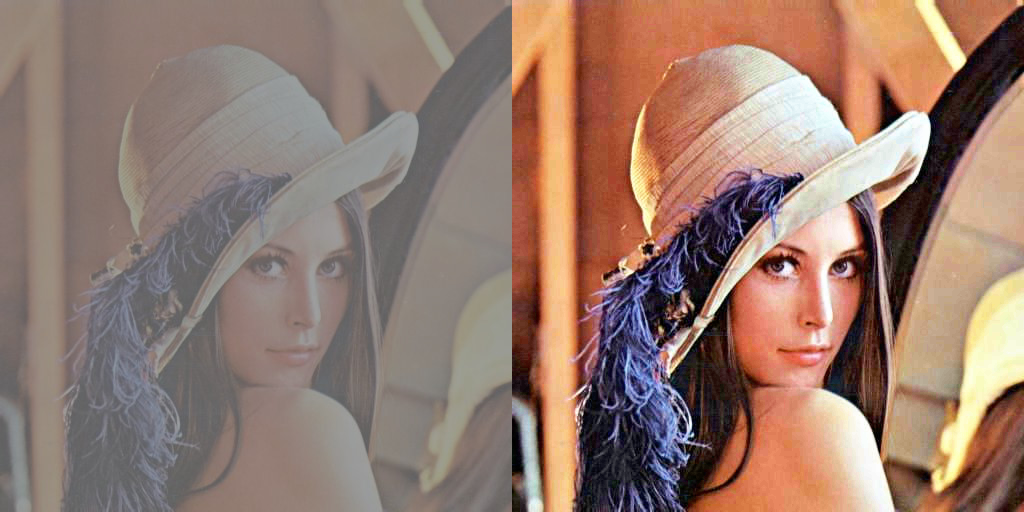

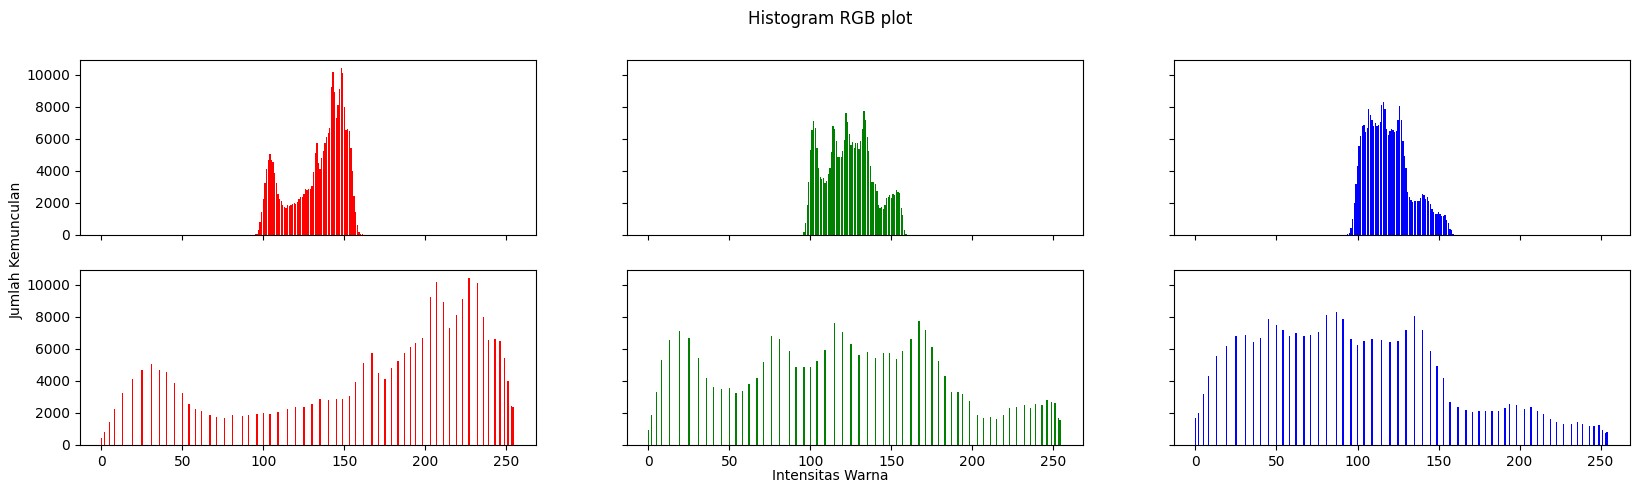

In [ ]:
# Step 1: Read the image
img1 = cv.imread('/content/drive/MyDrive/PCVK/img/lena_lc.jpg')

# Step 2: Define the histogram function
def histog(img1):
  # Get the image dimensions
  height, width, depth = np.shape(img1)

  # Create an array to store the histogram values
  ax = np.zeros((3,256))

  # Iterate over each pixel in the image
  for y in range(0,height) :
    for x in range(0,width) :
      # Increment the histogram values for each channel
      ax[0][img1[y][x][0]] += 1
      ax[1][img1[y][x][1]] += 1
      ax[2][img1[y][x][2]] += 1

  # Return the histogram array
  return ax

# Step 3: Calculate the original histogram
histo_asli = histog(img1)

# Step 4: Convert the image to a numpy array
img_array = np.asarray(img1)

# Step 5: Calculate the normalized cumulative histogram
histogram_array = np.bincount(img_array.flatten(), minlength=256)
num_pixels = np.sum(histogram_array)
histogram_array = histogram_array / num_pixels
chistogram_array = np.cumsum(histogram_array)

# Step 6: Create the pixel mapping lookup table
transform_map = np.floor(255 * chistogram_array).astype(np.uint8)

# Step 7: Perform the transformation
img_list = list(img_array.flatten())
eq_img_list = [transform_map[p] for p in img_list]
eq_img_array = np.reshape(np.asarray(eq_img_list), img_array.shape)
img2 = eq_img_array

# Step 8: Calculate the equalized histogram
equal_histo = histog(img2)

# Step 9: Concatenate the original and equalized images
final_frame = cv.hconcat((img1, img2))
cv2_imshow(final_frame)

# Step 10: Plot the histograms
names = np.arange(256)
isgrayimg = np.array_equal(blue, green) and np.array_equal(blue, red)
if (isgrayimg == False):
  # Plot RGB histograms if the image is not grayscale
  fig, axs = plt.subplots(2, 3, figsize=[20,5], sharex=True, sharey=True)
  fig.suptitle('Histogram RGB plot')
  fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
  fig.text(0.5, 0.04, 'Intensitas Warna', ha='center')
  axs[0,0].bar(names, histo_asli[2], color='red')
  axs[0,1].bar(names, histo_asli[1], color='green')
  axs[0,2].bar(names, histo_asli[0], color='blue')
  axs[1,0].bar(names, equal_histo[2], color='red')
  axs[1,1].bar(names, equal_histo[1], color='green')
  axs[1,2].bar(names, equal_histo[0], color='blue')
else:
  # Plot grayscale histograms if the image is grayscale
  fig, axs = plt.subplots(1, 2, figsize=[20,5], sharex=True, sharey=True)
  fig.suptitle('Histogram RGB plot')
  fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
  fig.text(0.5, 0.94, 'Intensitas Warna', ha='center')
  axs[0,0].bar(names, histo_asli[2], color='gray')
  axs[0,1].bar(names, equal_histo[2], color='gray')

## 6.  Setelah mengerjakan soal no. 5, buatlah histogram citra yang sama akan tetapi menggunakan library yang dimiliki oleh CV2 yaitu “equalizeHist”. Bandingkan hasilnya. Apakah output muncul sama?

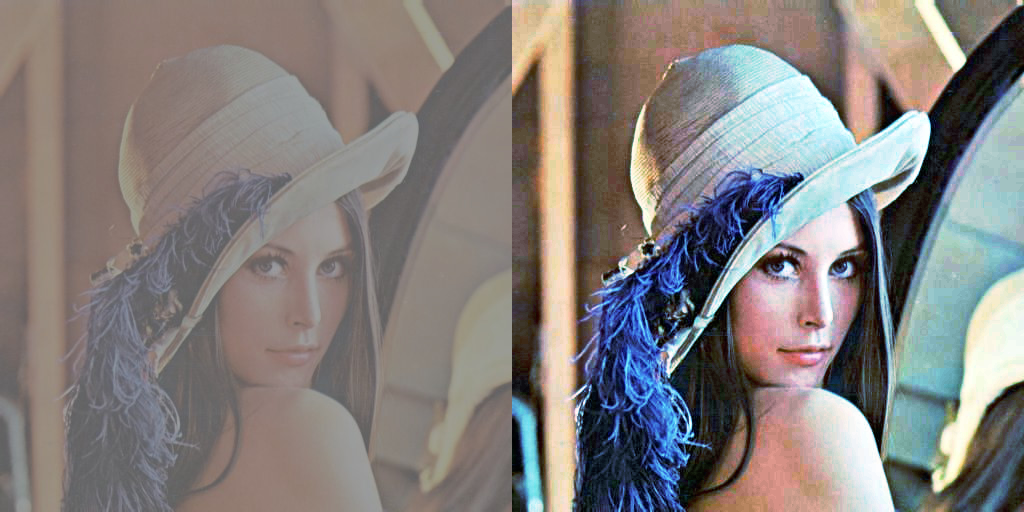

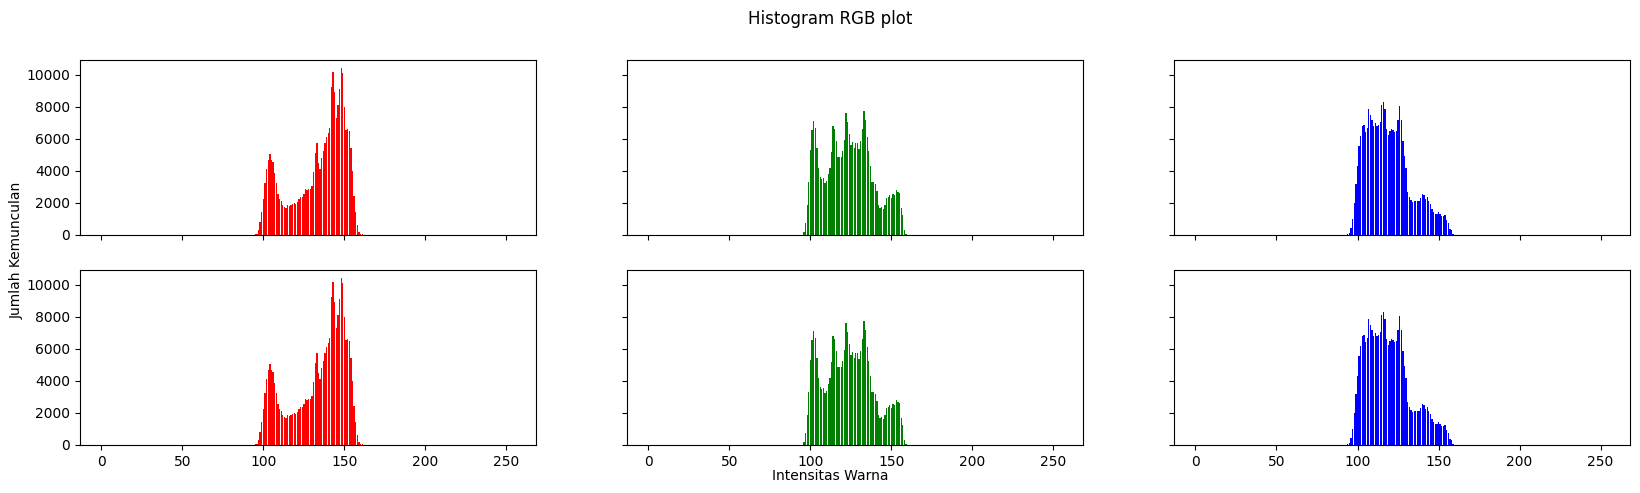

In [ ]:
channels = cv.split(img1)
eq_channels = []
for ch, color in zip(channels, ["r", "g", "b"]):
  eq_channels.append(cv.equalizeHist(ch))
eq_image = cv.merge(eq_channels)
equal_histo = histog(eq_image)

final_frame = cv.hconcat((img1, eq_image))
cv2_imshow(final_frame)

names = np.arange(256)
isgraying = np.array_equal(blue, green, red)
if (isgraying == False):
  fig, axs = plt.subplots(2, 3, figsize=[20,5], sharex=True, sharey =True)
  fig.suptitle('Histogram RGB plot')
  fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
  fig.text(0.5, 0.04, 'Intensitas Warna', ha='center')
  axs[0,0].bar(names, histo_asli[2], color='red')
  axs[0,1].bar(names, histo_asli[1], color='green')
  axs[0,2].bar(names, histo_asli[0], color='blue')
  axs[1,0].bar(names, histo_asli[2], color='red')
  axs[1,1].bar(names, histo_asli[1], color='green')
  axs[1,2].bar(names, histo_asli[0], color='blue')
else:
  fig, axs = plt.subplots(1, 2, figsize=[20,5], sharex=True, sharey=True)
  fig.suptitle('Histogram RGB plot')
  fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
  fig.text(0.5, 0.04, 'Intensitas Warna', ha='center')
  axs[0,0].bar(names, histo_asli[2], color='gray')
  axs[0,1].bar(names, equal_histo[2], color='gray')

## 7. Lakukanlah proses pemetaan 16 juta warna RGB ke dalam 8 warna saja, yaitu hitam, hijau, kuning, biru, cyan, magenta, putih seperti output berikut berdasarkan flowchart di bawah ini! (Gunakan gambar lena.jpg)

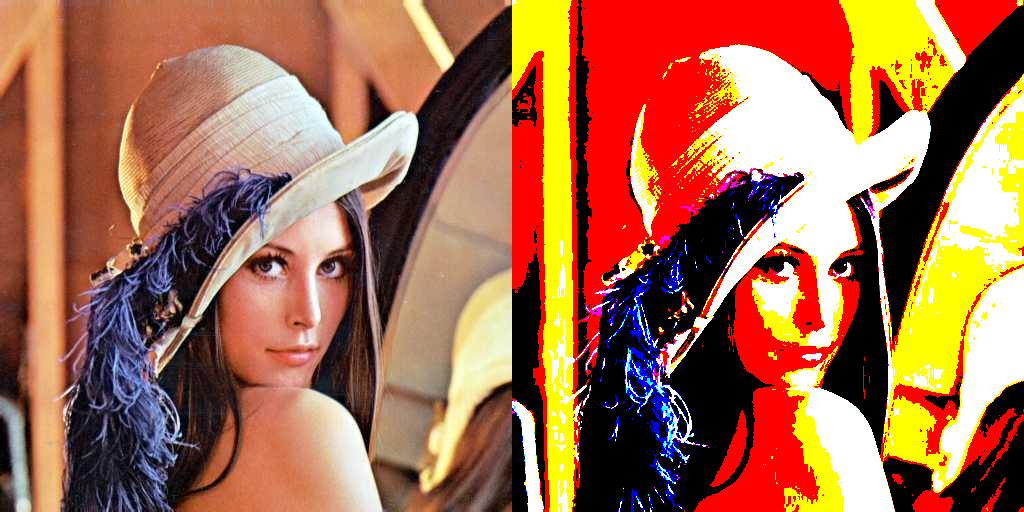

True

In [ ]:
img2 = cv.imread('/content/drive/MyDrive/PCVK/img/lena2.jpg', cv.IMREAD_COLOR)

def warnaTerdekat (r, g, b):
  pValue = 0
  minDistance = 255*255 + 255*255 + 255*255 + 1
  warnaPallette = [[0, 0, 0], [255, 0, 0], [0, 255, 0], [255, 255, 0], [0, 0, 255], [255, 0, 255], [0, 255, 255], [255, 255, 255]]
  for i in range(len(warnaPallette)):
    rDiff = r - warnaPallette[i][0]
    gDiff = g - warnaPallette[i][1]
    bDiff = b - warnaPallette[i][2]
    distance = rDiff*rDiff + gDiff*gDiff + bDiff*bDiff
    if (distance < minDistance):
      minDistance = distance
      pValue = i
  return pValue

warnaPallette = [[0, 0, 0], [255, 0, 0], [0, 255, 0], [255, 255, 0], [0, 0, 255], [255, 0, 255], [0, 255, 255], [255, 255, 255]]
img_16 = cv.cvtColor(img2, cv.COLOR_BGR2RGB)
img_8 = np.zeros(img_16.shape, img_16.dtype)

for y in range(0, img_16.shape[0]):
  for x in range(0, img_16.shape[1]):
    baru = warnaTerdekat(img_16[y, x, 0], img_16[y, x, 1], img_16[y, x, 2])
    img_8[y, x] = warnaPallette[baru]

img_16 = cv.cvtColor(img_16, cv.COLOR_BGR2RGB)
img_8 = cv.cvtColor(img_8, cv.COLOR_BGR2RGB)
final_frame = cv.hconcat((img_16, img_8))
cv2_imshow(final_frame)
cv.imwrite('/content/drive/MyDrive/PCVK/img/lena.jpg', img_8)

## 8. Lakukanlah proses dithering Floyd and Steinberg seperti output berikut (tampilan image awal, dan tampilan setelah dithering) berdasarkan flowchart di bagian bawah halaman modul ini! (Gunakan gambar lena.jpg)

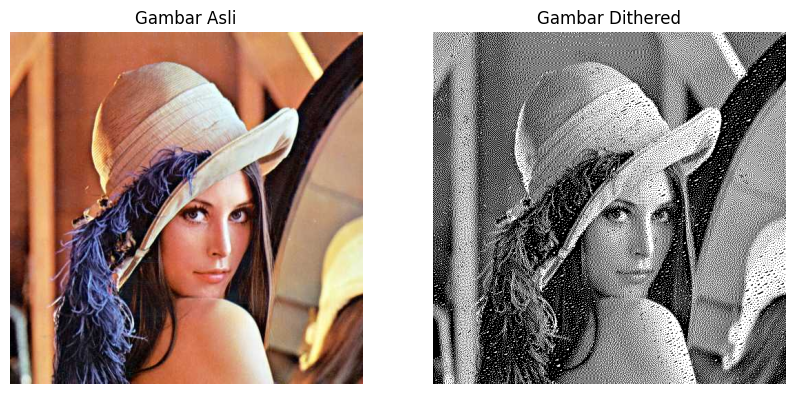

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

# Baca gambar menggunakan PIL
image = Image.open('/content/drive/MyDrive/PCVK/img/lena2.jpg')

# Ubah gambar menjadi skala abu-abu
gray_image = image.convert('L')

# Ubah gambar skala abu-abu menjadi array NumPy
pixel_array = np.array(gray_image)

# Lakukan proses dithering Floyd and Steinberg menggunakan algoritma yang sesuai
height, width = pixel_array.shape

for y in range(height):
    for x in range(width):
        old_pixel = pixel_array[y, x]
        new_pixel = 255 if old_pixel >= 128 else 0
        pixel_array[y, x] = new_pixel
        error = old_pixel - new_pixel

        if x < width - 1:
            pixel_array[y, x + 1] += (7 / 16) * error
        if x > 0 and y < height - 1:
            pixel_array[y + 1, x - 1] += (3 / 16) * error
        if y < height - 1:
            pixel_array[y + 1, x] += (5 / 16) * error
        if x < width - 1 and y < height - 1:
            pixel_array[y + 1, x + 1] += (1 / 16) * error

# Konversi array NumPy kembali menjadi gambar PIL
dithered_image = Image.fromarray(pixel_array)

# Tampilkan gambar awal dan gambar setelah proses dithering bersebelahan
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(image, cmap='gray')
axes[0].set_title('Gambar Asli')
axes[0].axis('off')

axes[1].imshow(dithered_image, cmap='gray')
axes[1].set_title('Gambar Dithered')
axes[1].axis('off')

plt.show()

## 9. Menggunakan lena_lc.jpg rubah menjadi grey image, kemudian terapkan histogram equalization sehingga terjadi perbaikan sebaran warna pada citra. Setelah itu dari hasil histogram equalization implementasikan proses dithering Floyd and Steinberg sehingga menampilkan gambar di bawah ini!


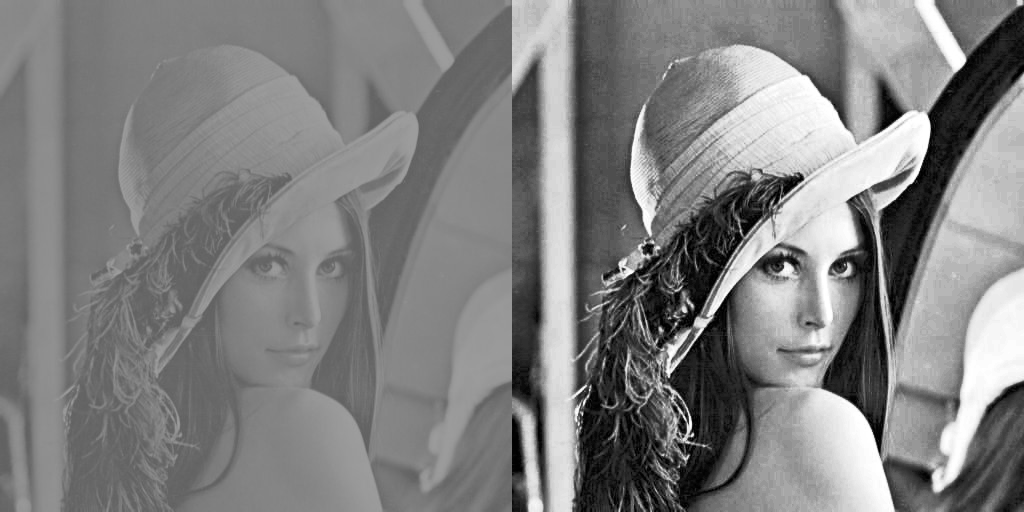

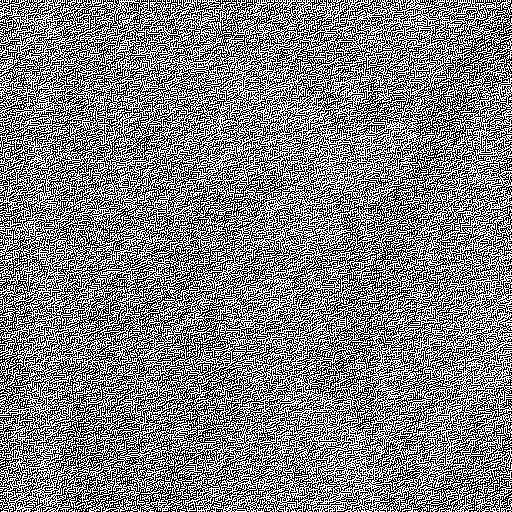

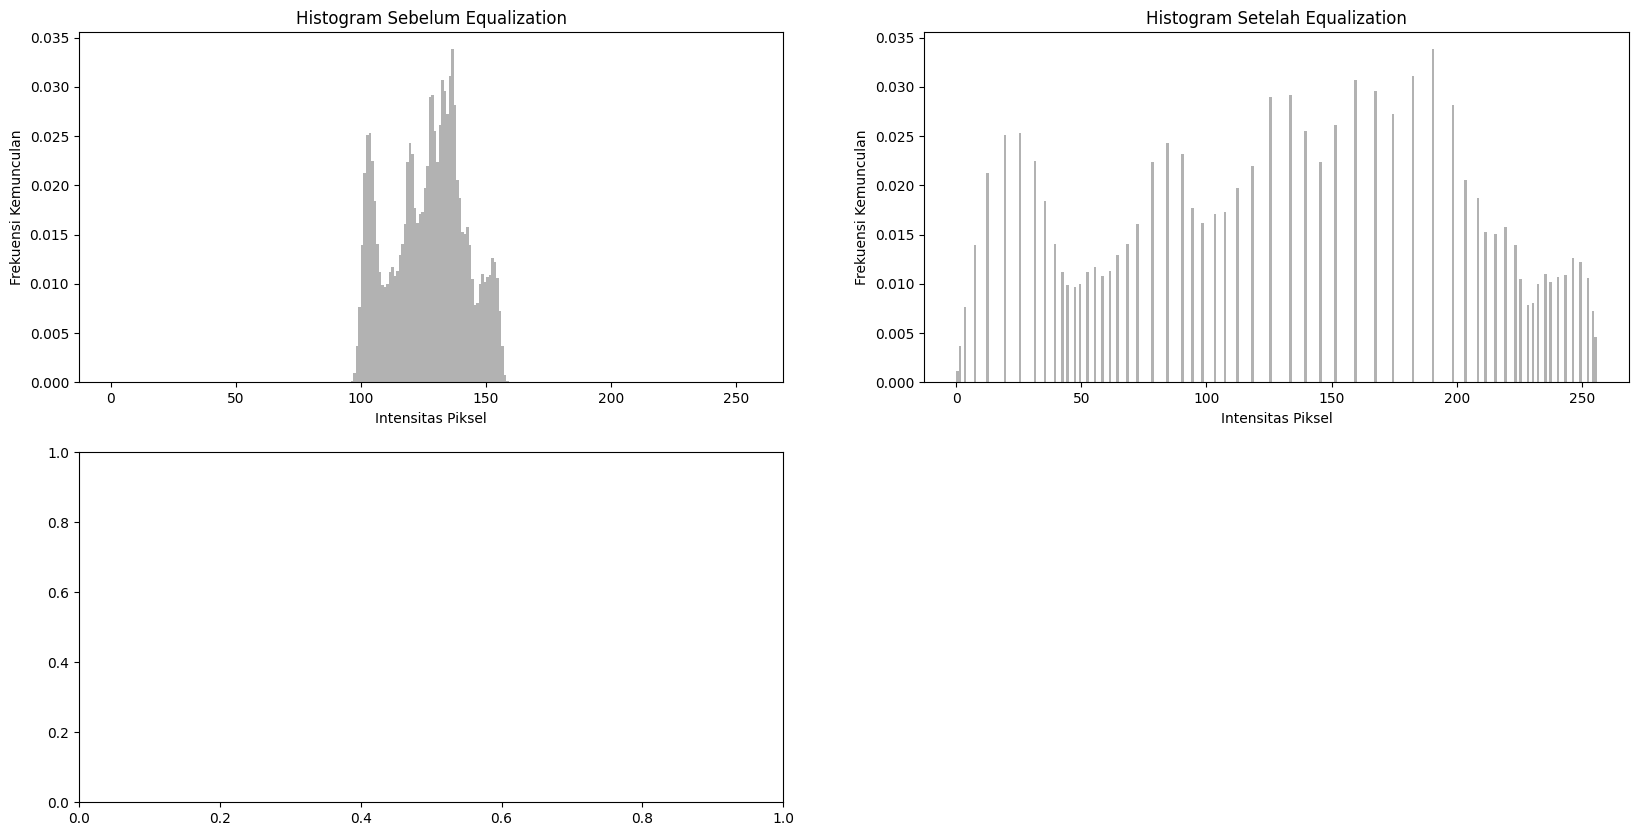

In [27]:
import cv2 as cv
import matplotlib.pyplot as plt

Image = cv.imread('/content/drive/MyDrive/PCVK/img/lena_lc.jpg')
img_gray = cv.cvtColor(Image, cv.COLOR_BGR2GRAY)

GrayImage = cv.cvtColor(Image, cv.COLOR_BGR2GRAY)

Height = GrayImage.shape[0]
Width = GrayImage.shape[1]

for y in range(0, Height):
    for x in range(0, Width):
        old_value = GrayImage[y, x]
        new_value = 0
        if old_value > 128:
            new_value = 255
        GrayImage[y, x] = new_value
        Error = old_value - new_value

        if x < Width - 1:
            NewNumber = GrayImage[y, x + 1] + Error
            if NewNumber > 255:
                NewNumber = 255
            elif NewNumber < 0:
                NewNumber = 0
            GrayImage[y, x + 1] = NewNumber

        if x > 0 and y < Height - 1:
            NewNumber = GrayImage[y + 1, x - 1] + Error
            if NewNumber > 255:
                NewNumber = 255
            elif NewNumber < 0:
                NewNumber = 0
            GrayImage[y + 1, x - 1] = NewNumber

        if y < Height - 1:
            NewNumber = GrayImage[y + 1, x] + Error
            if NewNumber > 255:
                NewNumber = 255
            elif NewNumber < 0:
                NewNumber = 0
            GrayImage[y + 1, x] = NewNumber

        if x < Width - 1 and y < Height - 1:
            NewNumber = GrayImage[y + 1, x + 1] + Error
            if NewNumber > 255:
                NewNumber = 255
            elif NewNumber < 0:
                NewNumber = 0
            GrayImage[y + 1, x + 1] = NewNumber

plt.figure(figsize=(20, 10))

plt.subplot(2, 2, 1)
plt.hist(img_gray.ravel(), bins=256, range=(0, 256), density=True, color='gray', alpha=0.6)
plt.xlabel('Intensitas Piksel')
plt.ylabel('Frekuensi Kemunculan')
plt.title('Histogram Sebelum Equalization')

# Equalization
img_equalized = cv.equalizeHist(img_gray)

# Menampilkan histogram setelah histogram equalization
plt.subplot(2, 2, 2)
plt.hist(img_equalized.ravel(), bins=256, range=(0, 256), density=True, color='gray', alpha=0.6)
plt.xlabel('Intensitas Piksel')
plt.ylabel('Frekuensi Kemunculan')
plt.title('Histogram Setelah Equalization')

plt.subplot(2, 2, 3)

final_frame = cv.hconcat((img_gray, img_equalized))
cv2_imshow(final_frame)
cv2_imshow(GrayImage)